# Predict the variable " Value-Co2-emissions"

### **MODULE IMPORT**

In [78]:
# Loading the necessary libraries
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(dplyr)

### **DATA IMPORT**

In [79]:
#Read the data
path    = 'data/'  # If data in 'data' directory
df <- read.table(paste(path, "global_data_on_sustainable_energy.csv", sep = ""),
                    sep = ",", header = TRUE)

head(df)

summary(df)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

### **DATA PRE-PROCESSING**
Refining data processing to generate a cleaner and improved dataset for enhanced machine learning outcomes.<br>

Performing below steps:<br>
1. <b>COLUMN RENAMING</b>  - Rewriting column names to create more meaningful and concise labels.<br>
2. <b>COLUMN REMOVER</b>    - Removing un-necessary columns not required for the data analysis.<br>
3. <b>COLUMN NULL</b>    - Immediately handling Null values to ensure smooth data processing.<br>
4. <b>COLUMN DATATYPE</b>  - Converting column types to suitable data types for enhanced operational efficiency.<br>
5. <b>DATA DUPLICATION</b> - Implementing procedures to handle data duplications within the dataset effectively.<br>
6. <b>DATA IMPUTATION</b>  - Addressing the treatment of null, NaN, or None values by mapping and imputing them to appropriate replacement values.<br>
7. <b>DATA STANDARIZATION</b>   - Standardizing data format to enhance data quality.<br>

### <b>COLUMN RENAMING</b>

<font size="+0.8"><b>Input File Column Names and Features:</b></font>
<ul>
    <br><li><b>Entity</b>: The name of the country or region for which the data is reported.</li>
    <br><li><b>Year</b>: The year for which the data is reported, ranging from 2000 to 2020.</li>
    <br><li><b>Access to electricity (% of population)</b>: The percentage of population with access to electricity.</li>
    <br><li><b>Access to clean fuels for cooking (% of population)</b>: The percentage of the population with primary reliance on clean fuels.</li>
    <br><li><b>Renewable-electricity-generating-capacity-per-capita</b>: Installed Renewable energy capacity per person</li>
    <br><li><b>Financial flows to developing countries (US \$)</b>: Aid and assistance from developed countries for clean energy projects.</li>
    <br><li><b>Renewable energy share in total final energy consumption (%)</b>: Percentage of renewable energy in final energy consumption.</li>
    <br><li><b>Electricity from fossil fuels (TWh)</b>: Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.</li>
    <br><li><b>Electricity from nuclear (TWh)</b>: Electricity generated from nuclear power in terawatt-hours.</li>
    <br><li><b>Electricity from renewables (TWh)</b>: Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.</li>
    <br><li><b>Low-carbon electricity (% electricity)</b>: Percentage of electricity from low-carbon sources (nuclear and renewables).</li>
    <br><li><b>Primary energy consumption per capita (kWh/person)</b>: Energy consumption per person in kilowatt-hours.</li>
    <br><li><b>Energy intensity level of primary energy (MJ/$2011 PPP GDP)</b>: Energy use per unit of GDP at purchasing power parity.</li>
    <br><li><b>Value_co2_emissions (metric tons per capita)</b>: Carbon dioxide emissions per person in metric tons.</li>
    <br><li><b>Renewables (% equivalent primary energy)</b>: Equivalent primary energy that is derived from renewable sources.</li>
    <br><li><b>GDP growth (annual %)</b>: Annual GDP growth rate based on constant local currency.</li>
    <br><li><b>GDP per capita</b>: Gross domestic product per person.</li>
    <br><li><b>Density (P/Km2)</b>: Population density in persons per square kilometer.</li>
    <br><li><b>Land Area (Km2)</b>: Total land area in square kilometers.</li>
    <br><li><b>Latitude</b>: Latitude of the country's centroid in decimal degrees.</li>
    <br><li><b>Longitude</b>: Longitude of the country's centroid in decimal degrees.</li>
</ul>

In [80]:
print(colnames(df))

 [1] "Entity"                                                          
 [2] "Year"                                                            
 [3] "Access.to.electricity....of.population."                         
 [4] "Access.to.clean.fuels.for.cooking"                               
 [5] "Renewable.electricity.generating.capacity.per.capita"            
 [6] "Financial.flows.to.developing.countries..US..."                  
 [7] "Renewable.energy.share.in.the.total.final.energy.consumption...."
 [8] "Electricity.from.fossil.fuels..TWh."                             
 [9] "Electricity.from.nuclear..TWh."                                  
[10] "Electricity.from.renewables..TWh."                               
[11] "Low.carbon.electricity....electricity."                          
[12] "Primary.energy.consumption.per.capita..kWh.person."              
[13] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."     
[14] "Value_co2_emissions_kt_by_country"                        

In [81]:
df <- df %>%
  rename(country_name = 'Entity',
         reported_year = 'Year',
         population_with_power_percentage = `Access.to.electricity....of.population.`,
         population_with_cooking_fuel_percentage = `Access.to.clean.fuels.for.cooking`,
         renewable_capita = `Renewable.electricity.generating.capacity.per.capita`,
         foreign_aid_dollar = `Financial.flows.to.developing.countries..US...`,
         renewable_percentage_in_total_consumption = `Renewable.energy.share.in.the.total.final.energy.consumption....`,
         fossil_power_generate_per_hour = `Electricity.from.fossil.fuels..TWh.`,
         nuclear_power_generate_per_hour = `Electricity.from.nuclear..TWh.`,
         renewable_power_generate_per_hour = `Electricity.from.renewables..TWh.`,
         decarbonized_power_percentage = `Low.carbon.electricity....electricity.`,
         per_capita_power = `Primary.energy.consumption.per.capita..kWh.person.`,
         power_to_gdp = `Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.`,
         co2_per_capita = Value_co2_emissions_kt_by_country,
         renewable_percentage = `Renewables....equivalent.primary.energy.`,
         gdp_growth = gdp_growth,
         gdp_per_capita = gdp_per_capita,
         population_density = `Density.n.P.Km2.`,
         country_area = `Land.Area.Km2.`,
         country_latitude = Latitude,
         country_longitude = Longitude)


head(df)

,country_name,reported_year,population_with_power_percentage,population_with_cooking_fuel_percentage,renewable_capita,foreign_aid_dollar,renewable_percentage_in_total_consumption,fossil_power_generate_per_hour,nuclear_power_generate_per_hour,renewable_power_generate_per_hour,⋯,per_capita_power,power_to_gdp,co2_per_capita,renewable_percentage,gdp_growth,gdp_per_capita,population_density,country_area,country_latitude,country_longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


In [82]:
df <- df %>% select(-fossil_power_generate_per_hour)  # For pedagogic purpose


In [83]:
str(df)

'data.frame':	3649 obs. of  20 variables:
 $ country_name                             : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ reported_year                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ population_with_power_percentage         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ population_with_cooking_fuel_percentage  : num  6.2 7.2 8.2 9.5 10.9 ...
 $ renewable_capita                         : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ foreign_aid_dollar                       : num  20000 130000 3950000 25970000 NA ...
 $ renewable_percentage_in_total_consumption: num  45 45.6 37.8 36.7 44.2 ...
 $ nuclear_power_generate_per_hour          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ renewable_power_generate_per_hour        : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ decarbonized_power_percentage            : num  66 84.7 81.2 67 62.9 ...
 $ per_capita_power                         : num  303 237 2

In this case, the years follow a sequential order from 2000 to 2020. Therefore, "Year" can be considered a categorical variable with order. This means that the years are not merely labels but represent a progression in time, with each year having a logical and sequential relationship to the previous and subsequent years.

In [84]:

df[, "country_name"] <- as.factor(df[, "country_name"])
df[, "reported_year"] <- as.factor(df[, "reported_year"])
df$population_density <- as.numeric(gsub(",", "", df$population_density))
str(df)

'data.frame':	3649 obs. of  20 variables:
 $ country_name                             : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ reported_year                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ population_with_power_percentage         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ population_with_cooking_fuel_percentage  : num  6.2 7.2 8.2 9.5 10.9 ...
 $ renewable_capita                         : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ foreign_aid_dollar                       : num  20000 130000 3950000 25970000 NA ...
 $ renewable_percentage_in_total_consumption: num  45 45.6 37.8 36.7 44.2 ...
 $ nuclear_power_generate_per_hour          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ renewable_power_generate_per_hour        : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ decarbonized_power_percentage            : num  66 84.7 81.2 67 62.9 ...
 $ per_capita_power                         : num  303 237

In [85]:
sum(duplicated(df))

[1] 0

There is no duplicated row in the dataframe

In [86]:
# Calculate the missing rate
missing_rates <- colMeans(is.na(df))
print(missing_rates)

                             country_name 
                             0.0000000000 
                            reported_year 
                             0.0000000000 
         population_with_power_percentage 
                             0.0027404768 
  population_with_cooking_fuel_percentage 
                             0.0463140586 
                         renewable_capita 
                             0.2551383941 
                       foreign_aid_dollar 
                             0.5724856125 
renewable_percentage_in_total_consumption 
                             0.0531652508 
          nuclear_power_generate_per_hour 
                             0.0345300082 
        renewable_power_generate_per_hour 
                             0.0057550014 
            decarbonized_power_percentage 
                             0.0115100027 
                         per_capita_power 
                             0.0000000000 
                             power_to_gdp 
           

There are three variables with very high rate of missing data (greater than 25%) : "renewable_capita", "foreign_aid_dollar" and "renewable_percentage", so we will remove them  

In [87]:
df <- df %>% select(-renewable_capita,-foreign_aid_dollar,-renewable_percentage)

In [88]:
# remove all individual having the missing data
df <- na.omit(df)

In [89]:
str(df)

'data.frame':	2868 obs. of  17 variables:
 $ country_name                             : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ reported_year                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ population_with_power_percentage         : num  14.7 20.1 25.4 30.7 36.1 ...
 $ population_with_cooking_fuel_percentage  : num  9.5 10.9 12.2 13.8 15.3 ...
 $ renewable_percentage_in_total_consumption: num  36.7 44.2 33.9 31.9 28.8 ...
 $ nuclear_power_generate_per_hour          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ renewable_power_generate_per_hour        : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ decarbonized_power_percentage            : num  67 62.9 63.4 76.2 78.9 ...
 $ per_capita_power                         : num  230 204 252 304 354 ...
 $ power_to_gdp                             : num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ co2_per_capita                           : num  1220 1030 155

In [90]:
summary(df)

              country_name  reported_year  population_with_power_percentage
 Algeria            :  20   2014   : 147   Min.   :  1.252                 
 Angola             :  20   2015   : 147   1st Qu.: 53.238                 
 Antigua and Barbuda:  20   2016   : 146   Median : 97.000                 
 Argentina          :  20   2017   : 146   Mean   : 76.585                 
 Armenia            :  20   2018   : 146   3rd Qu.:100.000                 
 Australia          :  20   2019   : 146   Max.   :100.000                 
 (Other)            :2748   (Other):1990                                   
 population_with_cooking_fuel_percentage
 Min.   :  0.00                         
 1st Qu.: 22.07                         
 Median : 81.55                         
 Mean   : 62.17                         
 3rd Qu.:100.00                         
 Max.   :100.00                         
                                        
 renewable_percentage_in_total_consumption nuclear_power_generat

In [91]:
# Reset the index of the rows of dataframes
rownames(df) <- NULL
head(df)

,country_name,reported_year,population_with_power_percentage,population_with_cooking_fuel_percentage,renewable_percentage_in_total_consumption,nuclear_power_generate_per_hour,renewable_power_generate_per_hour,decarbonized_power_percentage,per_capita_power,power_to_gdp,co2_per_capita,gdp_growth,gdp_per_capita,population_density,country_area,country_latitude,country_longitude
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Afghanistan,2003,14.73851,9.50,36.66,0,0.63,67.02128,229.9682,1.40,1220,8.832278,190.6838,60,652230,33.93911,67.70995
2,Afghanistan,2004,20.06497,10.90,44.24,0,0.56,62.92135,204.2312,1.20,1030,1.414118,211.3821,60,652230,33.93911,67.70995
3,Afghanistan,2005,25.39089,12.20,33.88,0,0.59,63.44086,252.0691,1.41,1550,11.229715,242.0313,60,652230,33.93911,67.70995
4,Afghanistan,2006,30.71869,13.85,31.89,0,0.64,76.19048,304.4209,1.50,1760,5.357403,263.7336,60,652230,33.93911,67.70995
5,Afghanistan,2007,36.05101,15.30,28.78,0,0.75,78.94737,354.2799,1.53,1770,13.826320,359.6932,60,652230,33.93911,67.70995
6,Afghanistan,2008,42.40000,16.70,21.17,0,0.54,73.97260,607.8335,1.94,3560,3.924984,364.6635,60,652230,33.93911,67.70995


### Unidimensional Statistics

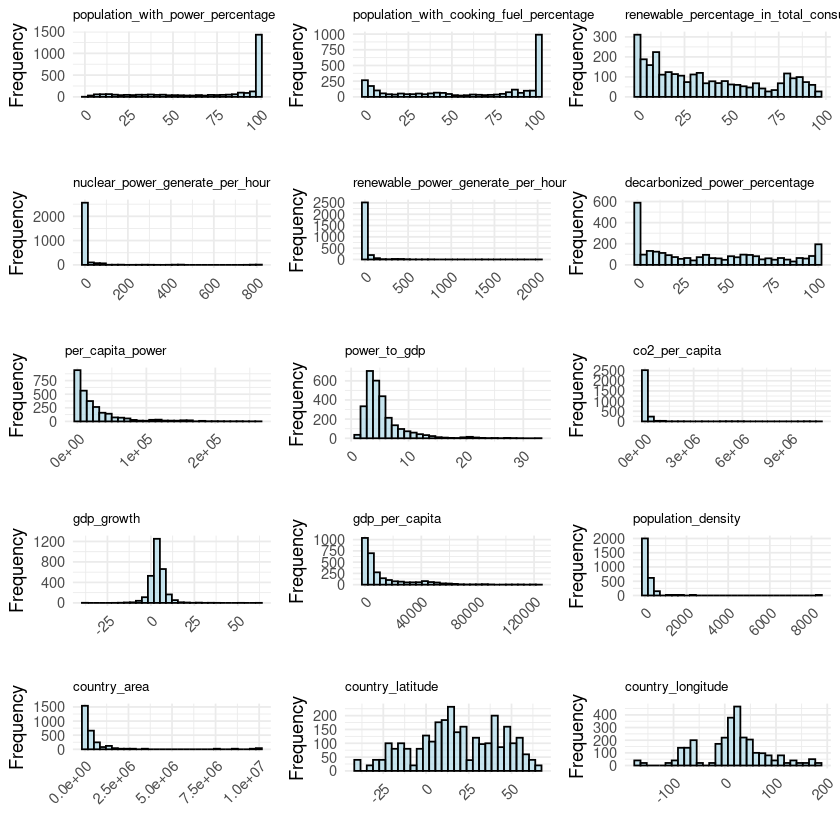

In [92]:
# Filter out the quantitative variables
quantitative_variables <- names(df)[sapply(df, is.numeric)]

# Create a list to store individual plots
plot_list <- list()

# Iterate over each quantitative variable and create individual plots
for (column in quantitative_variables) {
  plot <- ggplot(df, aes(x = !!sym(column))) + geom_histogram(bins = 30, color = "black", fill = "lightblue", alpha = 0.7) +
    labs(title = column, y = "Frequency", x = "") +
    theme_minimal() +
    theme(plot.title = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))    
  plot_list[[length(plot_list) + 1]] <- plot
}

# Arrange plots in a grid layout
grid.arrange(grobs = plot_list, ncol=3 )

#### Tranformation of some variables

Observing the above figures, we propose some transformation to make some distributions more symmetric and "Gaussian". In this case, most of the non-symetric distributions are right-skewed, so we use the logarithmic tranformation. 

In [93]:
df_normalized <- df
# List of variables to normalize
variables_to_normalize <- c(
    'population_with_power_percentage',
    'population_with_cooking_fuel_percentage',
    'nuclear_power_generate_per_hour',
    'renewable_power_generate_per_hour',
    'per_capita_power',
    'power_to_gdp',
    'co2_per_capita',
    'gdp_per_capita',
    'population_density',
    'country_area'
)

# Apply log transformation to the right-skewed variables
for (variable in variables_to_normalize) {
  if (grepl("percentage$", variable)) {
    df_normalized[paste0("log_", variable)] <- log(100 - df_normalized[[variable]] + 0.1)
  } else {
    df_normalized[paste0("log_", variable)] <- log(df_normalized[[variable]] + 1)
  }
}

# Drop the original variables
df_normalized <- df_normalized[, !names(df_normalized) %in% variables_to_normalize]

# Check the updated dataframe
head(df_normalized)

,country_name,reported_year,renewable_percentage_in_total_consumption,decarbonized_power_percentage,gdp_growth,country_latitude,country_longitude,log_population_with_power_percentage,log_population_with_cooking_fuel_percentage,log_nuclear_power_generate_per_hour,log_renewable_power_generate_per_hour,log_per_capita_power,log_power_to_gdp,log_co2_per_capita,log_gdp_per_capita,log_population_density,log_country_area
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2003,36.66,67.02128,8.832278,33.93911,67.70995,4.446895,4.506454,0,0.4885800,5.442280,0.8754687,7.107425,5.255847,4.110874,13.38815
2,Afghanistan,2004,44.24,62.92135,1.414118,33.93911,67.70995,4.382464,4.490881,0,0.4446858,5.324137,0.7884574,6.938284,5.358387,4.110874,13.38815
3,Afghanistan,2005,33.88,63.44086,11.229715,33.93911,67.70995,4.313602,4.476200,0,0.4637340,5.533663,0.8796267,7.346655,5.493190,4.110874,13.38815
4,Afghanistan,2006,31.89,76.19048,5.357403,33.93911,67.70995,4.239618,4.457250,0,0.4946962,5.721691,0.9162907,7.473637,5.578724,4.110874,13.38815
5,Afghanistan,2007,28.78,78.94737,13.826320,33.93911,67.70995,4.159648,4.440296,0,0.5596158,5.872906,0.9282193,7.479300,5.888028,4.110874,13.38815
6,Afghanistan,2008,21.17,73.97260,3.924984,33.93911,67.70995,4.055257,4.423648,0,0.4317824,6.411545,1.0784096,8.177797,5.901714,4.110874,13.38815


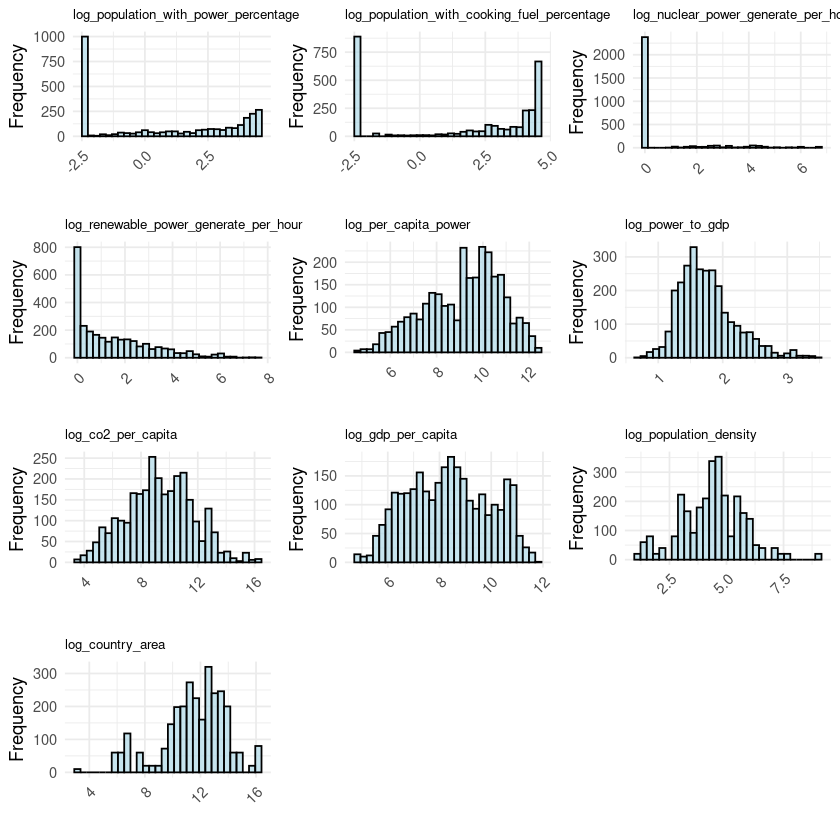

In [94]:
# Create a list to store individual plots
plot_list <- list()

# Iterate over each variable and create individual plots
for (column in variables_to_normalize) {
  plot <- ggplot(df_normalized, aes(x = !!sym(paste0("log_", column)))) +
    geom_histogram(bins = 30, color = "black", fill = "lightblue", alpha = 0.7) +
    labs(title = paste0("log_", column), y = "Frequency", x = "") +
    theme_minimal() +
    theme(plot.title = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))
  plot_list[[length(plot_list) + 1]] <- plot
}

# Calculate number of columns and rows based on the number of plots
num_plots <- length(plot_list)
ncol <- 3
nrow <- ceiling(num_plots / ncol)

# Arrange plots in a grid layout with specified size
grid.arrange(grobs = plot_list, ncol = ncol, nrow = nrow, widths = rep(5, ncol), heights = rep(3, nrow))

After applying the log-transformation, most of the distributions become more symetric. However, there are still some special cases:  
 _ ***log_nuclear_power_generate_per_hour*** and ***log_renewable_power_generate_per_hour still*** show a concentration of values at the lower end, indicating that these variables have a lot of zero or near-zero values.  
 _ The variable ***log_population_density*** shows multiple peaks. This could indicate the presence of subgroups within the data. It might be worth investigating whether there is a categorical variable that segments the data into these subgroups, or whether these represent different population distribution patterns (urban vs. rural, for instance).  
 _ ***log_country_area*** still have some outliers as evidenced by the long tails.

In [96]:
# Compute average CO2 emissions per capita for each country
avg_co2_per_country <- df %>%
  group_by(country_name) %>%
  summarize(avg_co2_per_capita = mean(co2_per_capita, na.rm = TRUE)) %>%
  arrange(desc(avg_co2_per_capita))

# Display the result
print(avg_co2_per_country)

# A tibble: 148 × 2
   country_name   avg_co2_per_capita
   <fct>                       <dbl>
 1 China                    7636642.
 2 United States            5329539.
 3 India                    1633979.
 4 Japan                    1183734.
 5 Germany                   773645.
 6 Canada                    547645.
 7 United Kingdom            470604.
 8 Mexico                    444619.
 9 Italy                     399400.
10 South Africa              398042.
# ℹ 138 more rows


Selecting by avg_co2_per_capita


# A tibble: 5 × 2
  country_name  avg_co2_per_capita
  <fct>                      <dbl>
1 China                   7636642.
2 United States           5329539.
3 India                   1633979.
4 Japan                   1183734.
5 Germany                  773645.


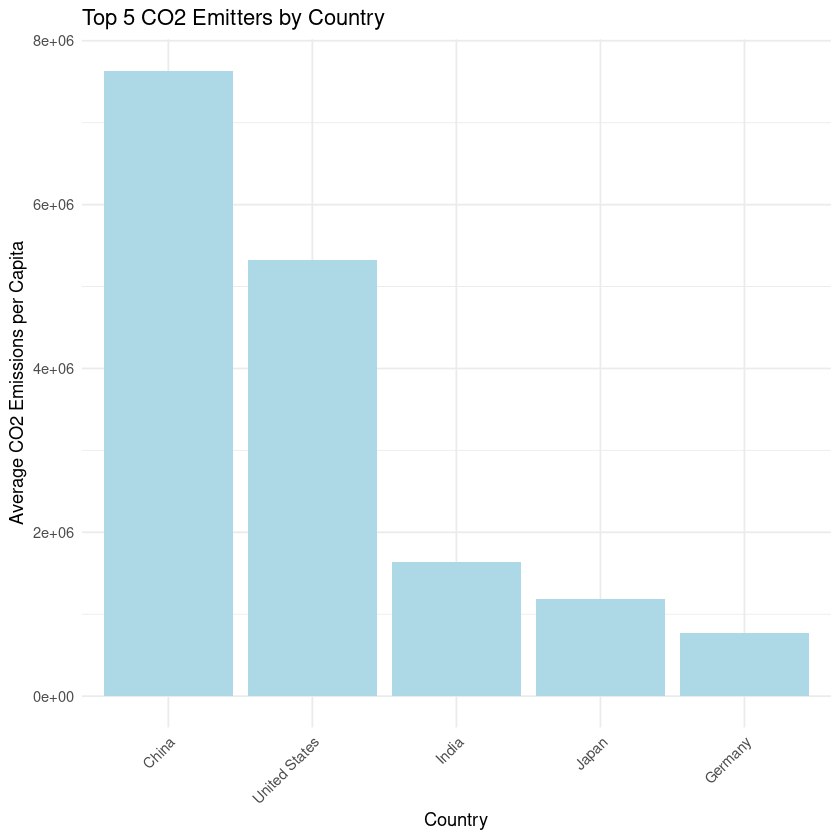

In [111]:
# Take the top 5 CO2 emitters
top_5_co2_emitters <- avg_co2_per_country %>%
  top_n(5) %>%
  arrange(desc(avg_co2_per_capita))

# Reorder the levels of country_name in descending order of avg_co2_per_capita
top_5_co2_emitters$country_name <- factor(top_5_co2_emitters$country_name, levels = (top_5_co2_emitters$country_name))

# Print the top 5 CO2 emitters
print(top_5_co2_emitters)

# Visualize the data
ggplot(top_5_co2_emitters, aes(x = country_name, y = avg_co2_per_capita)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(title = "Top 5 CO2 Emitters by Country",
       y = "Average CO2 Emissions per Capita",
       x = "Country") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



China is the country with the highest emission of CO2 per capita

#### Bidimensional Statistics

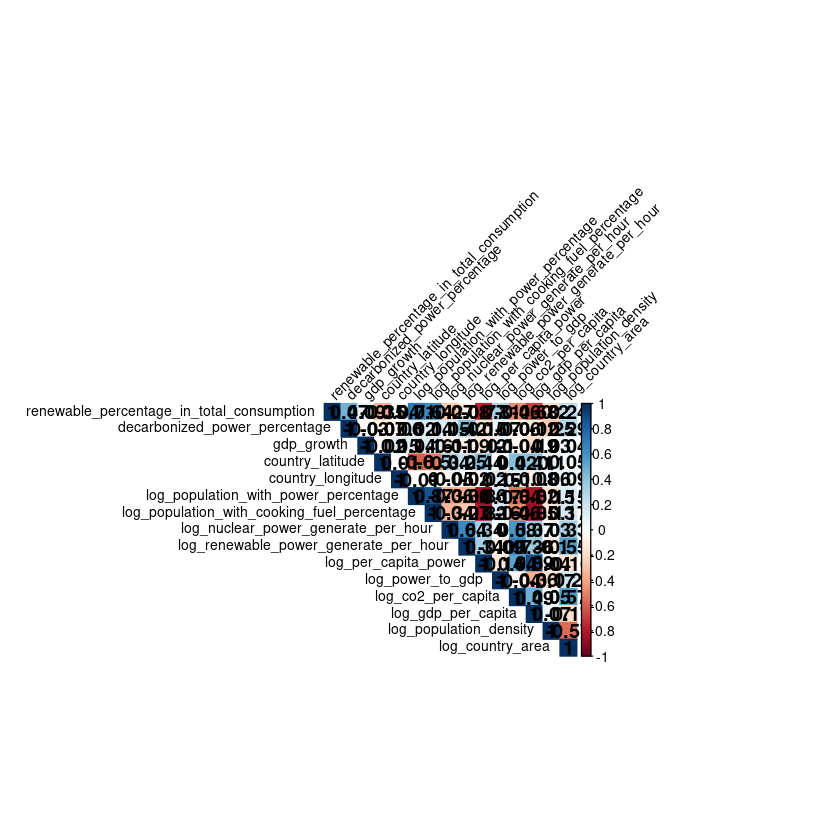

In [122]:
quantitative_variables <- names(df_normalized)[sapply(df_normalized, is.numeric)]

# Compute correlation matrix
corr_matrix <- cor(df_normalized[quantitative_variables])

# Create the heatmap
corrplot(corr_matrix, method = "color", type = "upper", 
         addCoef.col = "black", tl.col = "black", tl.srt = 45, 
         tl.cex = 0.7, cl.cex = 0.7)